In [2]:
import mlrose_hiive as mlrose
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as pl
from time import time



In [3]:
ran = range(10,90,10)
def run_sa():
    results = {}
    results["time"] = {}
    results["fitness"] = {}
    results["iterations"] = {}
    results["curve"] = {}
    for n in ran:
        print(n)
        start = time()
        state = np.array([])
        for i in range(n):
            state = np.append(state,i)
        fitness_cust = mlrose.FourPeaks(t_pct=0.15)
        schedule = mlrose.GeomDecay()
        problem_cust = mlrose.DiscreteOpt(length = n, fitness_fn = fitness_cust, maximize = True, max_val = 2)
        best_state, best_fitness, best_curve = mlrose.simulated_annealing(problem_cust, schedule = schedule, 
                                                      max_attempts = 10, max_iters = 3000, 
                                                      init_state = state, random_state = 1, curve= True)
        end = time()
        results["time"][n] = end - start
        results["fitness"][n] = best_fitness
        results["iterations"][n] = best_curve.shape[0]
        results["curve"][n] = best_curve

    return results

def run_hill():
    results = {}
    results["time"] = {}
    results["fitness"] = {}
    results["iterations"] = {}
    results["curve"] = {}
    for n in ran:
        print(n)
        start = time()
        state = np.array([])
        for i in range(n):
            state = np.append(state,i)
        fitness_cust = mlrose.FourPeaks(t_pct=0.15)
        problem_cust = mlrose.DiscreteOpt(length = n, fitness_fn = fitness_cust, maximize = True, max_val = 2)
        best_state, best_fitness, best_curve = mlrose.random_hill_climb(problem_cust, 
                                                      max_iters = 1000, restarts = 10,
                                                      init_state = state, random_state = 1, curve= True)
        end = time()
        results["time"][n] = end - start
        results["fitness"][n] = best_fitness
        results["iterations"][n] = best_curve.shape[0]
        results["curve"][n] = best_curve

    return results

def run_genetic():
    results = {}
    results["time"] = {}
    results["fitness"] = {}
    results["iterations"] = {}
    results["curve"] = {}
    for n in ran:
        print(n)
        start = time()
        state = np.array([])
        for i in range(n):
            state = np.append(state,i)
        fitness_cust = mlrose.FourPeaks(t_pct=0.15)
        problem_cust = mlrose.DiscreteOpt(length = n, fitness_fn = fitness_cust, maximize = True, max_val = 2)
        best_state, best_fitness, best_curve = mlrose.genetic_alg(problem_cust, 
                                                      pop_size = 200, mutation_prob = 0.1,
                                                      max_attempts = 10, max_iters = 1000,
                                                      curve = True, random_state = 1)
        end = time()
        results["time"][n] = end - start
        results["fitness"][n] = best_fitness
        results["iterations"][n] = best_curve.shape[0]
        results["curve"][n] = best_curve

    return results

def run_mimic():
    results = {}
    results["time"] = {}
    results["fitness"] = {}
    results["iterations"] = {}
    results["curve"] = {}
    for n in ran:
        print(n)
        start = time()
        state = np.array([])
        for i in range(n):
            state = np.append(state,i)
        fitness_cust = mlrose.FourPeaks(t_pct=0.15)
        problem_cust = mlrose.DiscreteOpt(length = n, fitness_fn = fitness_cust, maximize = True, max_val = 2)
        best_state, best_fitness, best_curve = mlrose.mimic(problem_cust, 
                                                      pop_size = 50, keep_pct = 0.1,
                                                      max_attempts = 5, max_iters = 1000,
                                                      curve = True, random_state = 1)
        end = time()
        results["time"][n] = end - start
        results["fitness"][n] = best_fitness
        results["iterations"][n] = best_curve.shape[0]
        results["curve"][n] = best_curve

    return results




In [4]:
results_sa = run_sa()
    
    

10
20
30
40
50
60
70
80


In [5]:
results_hill = run_hill()


10
20
30
40
50
60
70
80


In [6]:
results_gen = run_genetic()

10
20
30
40
50
60
70
80


In [7]:
results_mimic = run_mimic()

10
20
30
40
50
60
70
80


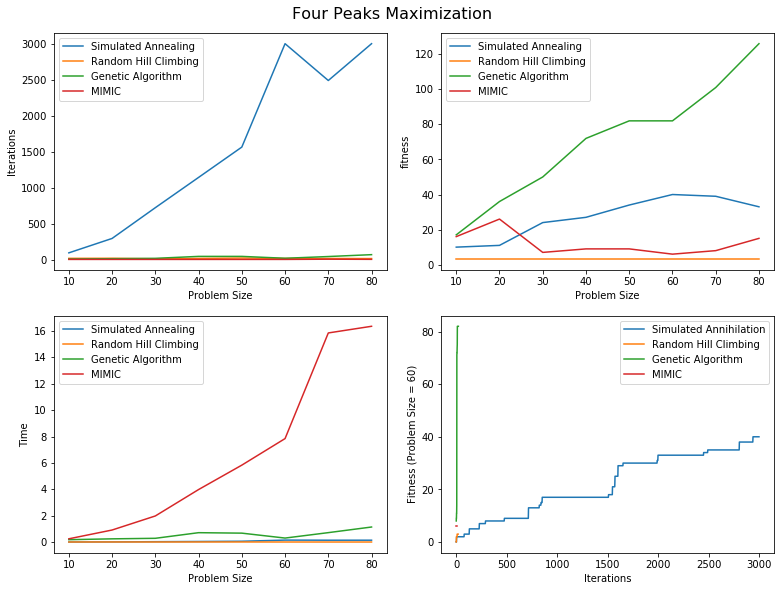

In [8]:
fig, ax = pl.subplots(nrows = 2, ncols = 2, figsize = (11,8))
ax[0, 0].plot(results_sa["iterations"].keys(),results_sa["iterations"].values(), label = "Simulated Annealing")
ax[0, 0].plot(results_hill["iterations"].keys(),results_hill["iterations"].values(), label = "Random Hill Climbing")
ax[0, 0].plot(results_gen["iterations"].keys(),results_gen["iterations"].values(), label = "Genetic Algorithm")
ax[0, 0].plot(results_mimic["iterations"].keys(),results_mimic["iterations"].values(), label = "MIMIC")
ax[0, 0].set_xlabel("Problem Size")
ax[0, 0].set_ylabel("Iterations")
ax[0, 0 ].legend()

ax[0, 1].plot(results_sa["fitness"].keys(),results_sa["fitness"].values(), label = "Simulated Annealing")
ax[0, 1].plot(results_hill["fitness"].keys(),results_hill["fitness"].values(), label = "Random Hill Climbing")
ax[0, 1].plot(results_gen["fitness"].keys(),results_gen["fitness"].values(), label = "Genetic Algorithm")
ax[0, 1].plot(results_mimic["fitness"].keys(),results_mimic["fitness"].values(), label = "MIMIC")
ax[0, 1].set_xlabel("Problem Size")
ax[0, 1].set_ylabel("fitness")
ax[0, 1].legend()

ax[1, 0].plot(results_sa["time"].keys(),results_sa["time"].values(), label = "Simulated Annealing")
ax[1, 0].plot(results_hill["time"].keys(),results_hill["time"].values(), label = "Random Hill Climbing")
ax[1, 0].plot(results_gen["time"].keys(),results_gen["time"].values(), label = "Genetic Algorithm")
ax[1, 0].plot(results_mimic["time"].keys(),results_mimic["time"].values(), label = "MIMIC")
ax[1, 0].set_xlabel("Problem Size")
ax[1, 0].set_ylabel("Time")
ax[1, 0].legend()

ax[1, 1].plot(list(range(results_sa["iterations"][60])),results_sa["curve"][60][:,0],label='Simulated Annihilation')
ax[1, 1].plot(list(range(results_hill["iterations"][60])),results_hill["curve"][60][:,0],label='Random Hill Climbing')
ax[1, 1].plot(list(range(results_gen["iterations"][60])),results_gen["curve"][60][:,0],label='Genetic Algorithm')
ax[1, 1].plot(list(range(results_mimic["iterations"][60])),results_mimic["curve"][60][:,0],label='MIMIC')
ax[1, 1].set_xlabel("Iterations")
ax[1, 1].set_ylabel("Fitness (Problem Size = 60)")
ax[1, 1].legend()

pl.suptitle("Four Peaks Maximization", fontsize = 16, x = 0.5, y = 1.02)
pl.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
pl.tight_layout()
pl.show()